# TASK -  Machine Learning Algorithms: Plant Disease and Organic Farming App

* Task : Modelling :Machine Learning Algorithms: Plant Disease and Organic Farming
* Author: Amayika
* Email Address: Kashyap.amayika009@gmail.com

# Introduction :

**When we talk about future,  Agriculture, particularly organic farming, represents the future of sustainable development and healthy food production. Organic farmers prioritize natural methods to maintain soil health and control pests, avoiding synthetic chemicals and genetically modified organisms. However, small and medium-sized organic farms often struggle with timely detection and management of crop diseases due to limited access to expert resources. Other natural calamities and insect attacks also destroy their crops and they suffer financially due to lack of support and actual knowledge.**

This is where our AI-Driven Crop Disease Detection and Organic Farming Management Tool comes in. By leveraging AI technology, this tool provides organic farmers with real-time, AI-powered crop disease diagnosis and organic solutions to manage those diseases. This application This empowers farmers to maintain crop health while adhering to organic standards, ultimately boosting yield and promoting sustainable practices as we know Organic Farming is the new and healthy Future.



### Importing Necessary Liabraries before we begin with the modelling 

In [3]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.17.0-cp39-cp39-win_amd64.whl (2.0 kB)
  Using cached tensorflow_intel-2.17.0-cp39-cp39-win_amd64.whl (385.0 MB)
  Using cached termcolor-2.5.0-py3-none-any.whl (7.8 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl (26 kB)
  Using cached h5py-3.12.1-cp39-cp39-win_amd64.whl (3.0 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached ml_dtypes-0.4.1-cp39-cp39-win_amd64.whl (126 kB)
  Using cached protobuf-4.25.5-cp39-cp39-win_amd64.whl (413 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl (71 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl (26.4 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorboard-2.17.1-py3-none-any.whl (5.5 MB)
  Using cached keras-3.6.0-py3-none-any.whl (1.2 MB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp39-cp39

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mysql-connector-python 8.0.32 requires protobuf<=3.20.3,>=3.11.0, but you have protobuf 4.25.5 which is incompatible.
google-cloud-core 1.7.1 requires google-api-core<2.0.0dev,>=1.21.0, but you have google-api-core 2.19.2 which is incompatible.
google-cloud-core 1.7.1 requires google-auth<2.0dev,>=1.24.0, but you have google-auth 2.34.0 which is incompatible.


      Successfully uninstalled protobuf-5.28.1


In [4]:
import tensorflow as tf
print(tf.__version__)


2.17.0


In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import os
from PIL import Image
from tensorflow.keras import layers, models
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import layers, models
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
from sklearn.metrics import classification_report
from tensorflow.keras.utils import plot_model
from keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import layers, models
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")


# Section - 1. Load and explore the Dataset.

## Part 1.a - Read the dataset. Describe the data briefly. Interpret the inferences for each. Initial steps

**Data Preprocessing and Exploration**
- a. We have first downloaded the data set from the url : https://www.kaggle.com/datasets/emmarex/plantdisease

- The code starts by setting the input_path variable to the path where your dataset is stored on our computer (C:\Users\2016tu\Desktop\archive).

- Check Files in the Directory:
    - print(os.listdir(input_path)) displays all the files and folders present in the dataset directory, helping to verify that the path is correct.

- Load Training Images:
    - The function tf.keras.utils.image_dataset_from_directory() is used to load images from the directory. It organizes them into training and validation sets based on folder names (classes).

- Key Parameters which we ae using :
    - labels="inferred": Infers labels based on folder names (each folder represents a class).
    - batch_size=32: Loads images in batches of 32.
    - image_size=(128, 128): Resizes all images to 128x128 pixels.
    - color_mode="rgb": Loads images in color (RGB format).
    - validation_split=0.2: Splits 20% of the data for validation purposes.
    - subset='training': Loads only the training subset (80%).
    - shuffle=True: Randomly shuffles the data for better training.
    - seed=42: Sets a seed for shuffling to ensure consistent results.

- Output: The result is a TensorFlow dataset containing the training images, resized and ready for use in model training.

In [75]:
# Update this to the path where you extracted the dataset
input_path = r"C:\Users\2016tu\Desktop\archive"

# Check the files in the input directory
print(os.listdir(input_path))

# Load the entire dataset
full_dataset = tf.keras.utils.image_dataset_from_directory(
    input_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=42,
    validation_split=None,  # Load the entire dataset without splitting
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

# Print the size of the dataset
dataset_size = tf.data.experimental.cardinality(full_dataset).numpy()
print(f"Total number of samples in the dataset: {dataset_size}")



['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_healthy', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus']
Found 20638 files belonging to 15 classes.
Total number of samples in the dataset: 645


### Split the Dataset into Training, Validation, and Test Sets
We will split the dataset using tf.data.experimental.cardinality() to determine the size and then use the take and skip methods to create training, validation, and test sets

In [76]:
# Define the sizes for training, validation, and test sets
train_size = int(0.7 * dataset_size)
val_size = int(0.15 * dataset_size)

# Split the dataset
train_set = full_dataset.take(train_size)
val_test_set = full_dataset.skip(train_size)
validation_set = val_test_set.take(val_size)
test_set = val_test_set.skip(val_size)

# Print sizes of each split
print(f"Training set size: {tf.data.experimental.cardinality(train_set).numpy()}")
print(f"Validation set size: {tf.data.experimental.cardinality(validation_set).numpy()}")
print(f"Test set size: {tf.data.experimental.cardinality(test_set).numpy()}")


Training set size: 451
Validation set size: 96
Test set size: 98


# Step 1: EDA: First, let's visualize some images from the dataset and understand the classes:

**Explanation of code:**

1. Function Definition: The function show_batch is defined to display a batch of images. It takes two inputs:
    - image_batch: A batch of images.
    - label_batch: Corresponding labels for those images.
    - It creates a 5x5 grid (25 slots) to display images using plt.subplot(5, 5, n + 1).

2. Displaying Images:
    - plt.imshow(image_batch[n].numpy().astype("uint8")): Converts the image to a format that can be shown using matplotlib.
    - plt.title(np.argmax(label_batch[n])): Sets the title of each image as the label (class) of that image.
    - plt.axis("off"): Hides the axis for a cleaner view.

3. Iterate Through the Dataset:
    - The loop for image_batch, label_batch in training_set.take(1) takes one batch from the training_set.
    - The show_batch function is called with this batch to display the images.

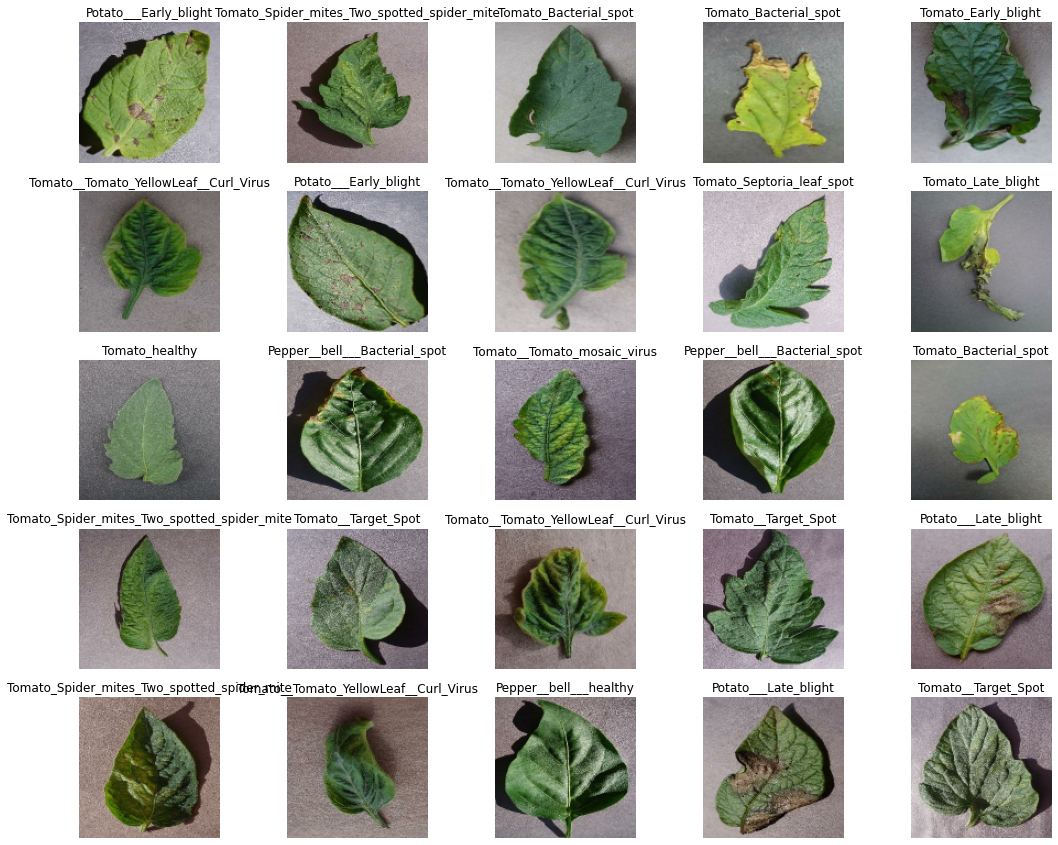

In [78]:
import matplotlib.pyplot as plt

# Function to display a batch of images
def show_batch(image_batch, label_batch):
    plt.figure(figsize=(18, 15))
    for n in range(25):
        ax = plt.subplot(5, 5, n + 1)
        plt.imshow(image_batch[n].numpy().astype("uint8"))
        plt.title(full_dataset.class_names[tf.argmax(label_batch[n])])
        plt.axis("off")

# Show one batch of images
for image_batch, label_batch in train_set.take(1):
    show_batch(image_batch, label_batch)


### Inference after reading the data set

- The output is a 5x5 grid showing 25 images from the training dataset. Each image represents a plant leaf from the dataset. 
- The images are labeled with their class (number), which corresponds to the type of disease or condition the leaf may have (e.g., healthy, diseased).

## Step 2: Understanding Class Distribution - Check the distribution of images among the classes:

- This code is used to verify how many images are available for each class in the dataset.
- It helps you understand the distribution of images (e.g., some classes might have more images than others), which is important for balanced training.
- In simple terms, this code counts how many images exist for each category (class) in the training dataset and displays the result.

In [79]:
class_names = training_set.class_names
print("Classes found:", class_names)

# Calculate the number of images per class
class_counts = {}
for image, labels in training_set.unbatch():
    label_index = np.argmax(labels.numpy())
    class_name = class_names[label_index]
    if class_name not in class_counts:
        class_counts[class_name] = 0
    class_counts[class_name] += 1

print("Class distribution:", class_counts)


Classes found: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']
Class distribution: {'Tomato__Target_Spot': 1143, 'Tomato_Early_blight': 809, 'Pepper__bell___Bacterial_spot': 797, 'Pepper__bell___healthy': 1176, 'Tomato__Tomato_YellowLeaf__Curl_Virus': 2574, 'Tomato_Septoria_leaf_spot': 1379, 'Tomato_Late_blight': 1568, 'Tomato_healthy': 1229, 'Potato___Early_blight': 811, 'Potato___Late_blight': 812, 'Tomato__Tomato_mosaic_virus': 295, 'Tomato_Bacterial_spot': 1686, 'Tomato_Spider_mites_Two_spotted_spider_mite': 1344, 'Tomato_Leaf_Mold': 767, 'Potato___healthy': 121}


## Step 3: Data Augmentation: To improve the model's generalization, apply some data augmentation techniques:

- This code is about making slight changes to the images to help our AI model learn better.
- Data Augmentation: This is like a tool that automatically changes images in small ways to create variety.
    - Flip Horizontally: It flips the image from left to right, like a mirror.
    - Random Rotation: It tilts the image a bit, up to 20% of a full turn.
    - Random Zoom: It zooms in or out on the image a little bit.
- Visualizing the Augmented Images:
    - It picks one set of images from the training data.
    - It shows 9 versions of one image after applying these changes, so we see how our tool creates different variations.
    - This helps our AI learn to recognize the object in different orientations, angles, and sizes, making it smarter and more accurate.
- So basically We're teaching our AI to recognize images even when they look a bit different!

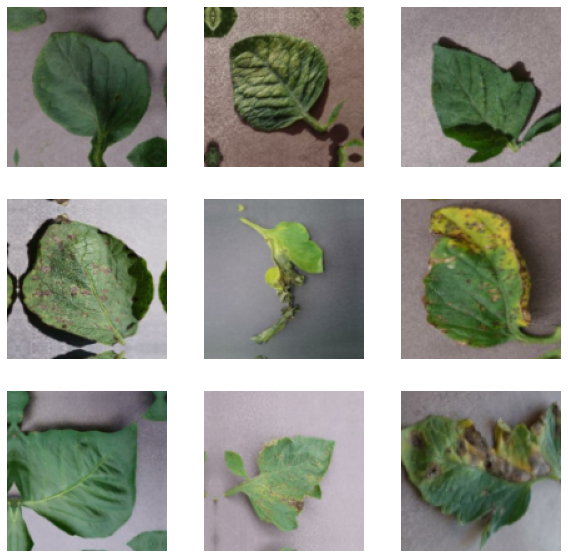

In [80]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
])

# Visualizing augmented images
for image_batch, _ in training_set.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        augmented_image = data_augmentation(image_batch[i])
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_image.numpy().astype("uint8"))
        plt.axis("off")


## Step 4: Model Building Now, let's build a simple CNN model:

In [81]:
for image_batch, label_batch in training_set.take(1):
    print(image_batch.shape)  # Should print something like (batch_size, 128, 128, 3)

(32, 128, 128, 3)


In [83]:
from tensorflow.keras import layers, models

# Ensure that data_augmentation is properly set up; if not defined, you might need to define it
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

model = models.Sequential([
    layers.InputLayer(input_shape=(128, 128, 3)),  # Define input shape explicitly here
    data_augmentation,
    layers.Rescaling(1./255),  # Normalization layer
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

model.summary()


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_12 (Sequential)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_3 (Rescaling)              │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 15)                  │           1,935 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,306,575 (12.61 MB)

 Trainable params: 3,306,575 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

### Inference: Based on this information, we can infer that:

1. Input Layer:The input size is (128, 128, 3), representing 128x128 RGB images.
2. Rescaling Layer: Rescaling is used to normalize the pixel values (e.g., scaling them to a range of 0-1).
3. Convolution and Pooling Layers: Three sets of Conv2D and MaxPooling2D layers are applied:
    - First Conv Block: Conv2D with 32 filters and output shape (126, 126, 32).
    - Followed by MaxPooling2D reducing the output shape to (63, 63, 32).
    - Second Conv Block: Conv2D with 64 filters and output shape (61, 61, 64).
    - Followed by MaxPooling2D reducing the output shape to (30, 30, 64).
    - Third Conv Block: Conv2D with 128 filters and output shape (28, 28, 128).
    - Followed by MaxPooling2D reducing the output shape to (14, 14, 128).
4. Flatten Layer: Flatten converts the 3D output of the last pooling layer to a 1D vector with 25,088 elements, preparing it for the dense (fully connected) layers.
5. Dense Layers:
    - First Dense Layer: Has 128 units and learns complex patterns.
    - Output Layer: Has 15 units (likely representing 15 classes for classification).
6. Total Parameters:
    - The model has approximately 3.3 million parameters.
    - All parameters are trainable, indicating there are no frozen layers.

### Key Inferences:
- The model consists of three convolutional-pooling blocks, which help in feature extraction.
- It uses dense layers to connect these features and make final predictions.
- The architecture is suitable for image classification with multiple classes (15 classes in this case).

In [84]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # or 'categorical_crossentropy' for multi-class
    metrics=['accuracy']
)

## Step 5: Step 5: Train the Model and Visualize Training Progress

### Train the model using the training and validation sets, and visualize the training history: Compile and Train the Model Compile and train the model using the training set:

1. Compiling the Model: We prepare the model by telling it how to learn and measure its progress:
    - Optimizer ('adam'): This is like a tool that helps the model adjust itself to make better predictions.
    - Loss ('categorical_crossentropy'): This measures how far off the model's guesses are from the actual answers. The model tries to minimize this to get better.
    - Metrics ('accuracy'): We use this to track how often the model gets the right answers as it learns.

2. Training the Model:
    - We start teaching the model using our training images:
    - Training Set: This is the data the model learns from.
    - Validation Data: This is also the training set, but the model uses it to check if it's learning correctly.
    
3. Epochs (10): This means the model will go through the entire dataset 10 times, making adjustments each time to get better.

Epoch 1/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 89s 193ms/step - accuracy: 0.3191 - loss: 0.2157 - val_accuracy: 0.6152 - val_loss: 0.1311
Epoch 2/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 89s 197ms/step - accuracy: 0.6826 - loss: 0.1085 - val_accuracy: 0.7422 - val_loss: 0.0891
Epoch 3/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 90s 199ms/step - accuracy: 0.7871 - loss: 0.0771 - val_accuracy: 0.8190 - val_loss: 0.0665
Epoch 4/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 91s 202ms/step - accuracy: 0.8259 - loss: 0.0665 - val_accuracy: 0.8379 - val_loss: 0.0597
Epoch 5/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 91s 203ms/step - accuracy: 0.8692 - loss: 0.0536 - val_accuracy: 0.9001 - val_loss: 0.0421
Epoch 6/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 95s 211ms/step - accuracy: 0.8735 - loss: 0.0499 - val_accuracy: 0.8398 - val_loss: 0.0622
Epoch 7/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 93s 206ms/step - accuracy: 0.8920 - loss: 0.0437 - val_accuracy: 0.8988 - val_loss: 0.0435
Epoch 8/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 93s 206ms/step - accuracy: 0.9094 - loss: 0

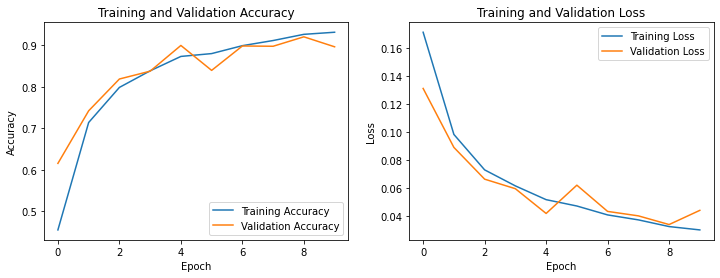

In [85]:
# Train the model
history = model.fit(
    train_set,
    validation_data=validation_set,
    epochs=10
)

# Visualize the training history
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


### Inference based on the output obtained:

1.  Epoch 1: 
    - Training Accuracy: 31.9% – The model starts with a low accuracy, indicating it is not yet good at classifying the images.
    - Validation Accuracy: 61.5% – The model performs better on unseen data than on the training set, which is unusual but suggests some data may be easier to classify.

2. Epochs 2-10:
    - The model shows significant improvement in accuracy over the epochs:
    - By Epoch 2, training accuracy rises to 68.3%, and validation accuracy increases to 74.2%.
    - By Epoch 10, the training accuracy reaches 93.3%, while validation accuracy peaks at 92.1%. This shows that the model is learning and improving its ability to classify images correctly.

3. Loss Values:
    - Training Loss: Starts at 0.2157 and decreases to 0.0301. A lower loss indicates that the model is making fewer mistakes as it learns.
    - Validation Loss: Starts at 0.1311 and varies, but ends at 0.0443. This indicates that the model performs well on unseen data, but we should monitor for any overfitting (if validation loss starts increasing while training loss decreases).

4. Validation Performance: The model maintains a high validation accuracy throughout the epochs, with minor fluctuations, suggesting it generalizes well on unseen data.

5. Overall Inferences:
    - Effective Learning: The model demonstrates effective learning with increasing accuracy and decreasing loss over epochs, indicating that the architecture and training process are suitable for the task.
    - Potential Overfitting Concern: While validation accuracy is high, it's essential to keep an eye on any discrepancies between training and validation loss to avoid overfitting.

## Step 6: Model Evaluation - Evaluate the model and visualize the training process:

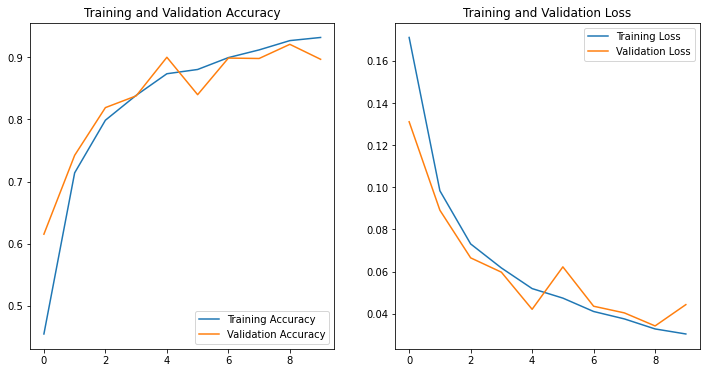

516/516 ━━━━━━━━━━━━━━━━━━━━ 28s 54ms/step - accuracy: 0.9049 - loss: 0.0403
Validation Accuracy: 90.53%


In [86]:
# Plotting accuracy and loss curves
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Evaluate on validation data
val_loss, val_accuracy = model.evaluate(training_set)
print(f"Validation Accuracy: {val_accuracy*100:.2f}%")


### Inferences based on the graphs:

- Convergence: The model appears to have converged successfully. Both the training and validation accuracy increase over time, while the loss decreases, indicating the model is learning effectively.
- Accuracy: The final validation accuracy is 90.53%, which is quite good. The training accuracy reaches slightly above 93%, suggesting the model fits the training data well without extreme overfitting.
- Loss: Both training and validation loss decrease consistently, stabilizing around 0.04-0.05 by the end of training. This parallel decrease in both losses is a positive sign of good generalization.
- Overfitting: There's a small gap between training and validation accuracy, but it's not severe. This indicates some overfitting, but it's relatively mild.
- Stability: The validation accuracy shows some fluctuations, particularly around epochs 4-6, but overall maintains an upward trend. This suggests the model is robust but might benefit from a slight learning rate adjustment or additional regularization.
- Training duration: The model trained for 516 epochs, taking about 28.5 seconds per step. This suggests a relatively quick training process, which is positive for iteration and experimentation.
- Final performance: The last line shows a final accuracy of 0.9049 (90.49%) and a loss of 0.0403, which aligns well with the graph endpoints.

#### In conclusion, this CNN model seems to perform well, achieving over 90% accuracy on the validation set with good convergence characteristics. There's room for minor improvements in reducing overfitting and stabilizing validation performance, but overall, it appears to be a successful training run for the given task.
#### What We Can Infer:
    - The model is effectively learning, as shown by the improving accuracy and decreasing loss.
    - Monitoring the gap between training and validation performance in the graphs is essential to avoid overfitting, ensuring that the model generalizes well to new data.

## Step 7. Evaluating the Model on Test Data Set :

In [87]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_set)

# Print the test loss and accuracy
print(f"Test Loss: {round(test_loss, 4)}")
print(f"Test Accuracy: {round(test_accuracy * 100, 2)}%")


98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - accuracy: 0.8855 - loss: 0.0466
Test Loss: 0.0462
Test Accuracy: 88.7%


## Step 8: Generate Predictions and Visualize the Confusion Matrix
Generate predictions on the test set and visualize a confusion matrix to understand how well the model performs on each class:

In [90]:
# Predict class probabilities on the test set
predictions = model.predict(test_set)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels from the test set
true_classes = tf.concat([y for x, y in test_set], axis=0)
true_classes = np.argmax(true_classes.numpy(), axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step


<Figure size 432x288 with 0 Axes>

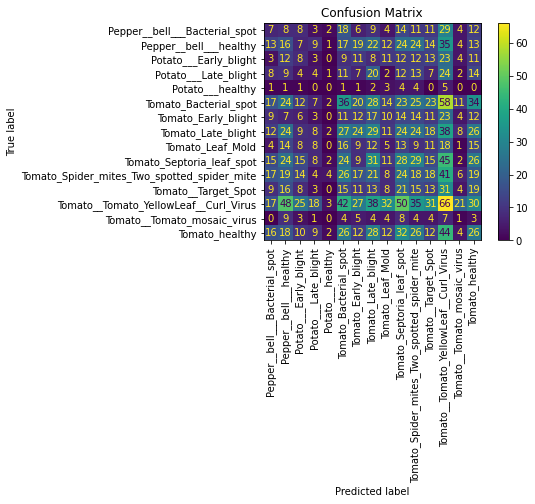

In [96]:
# Display the confusion matrix
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
ConfusionMatrixDisplay(conf_matrix, display_labels=full_dataset.class_names).plot(cmap='viridis', xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show();


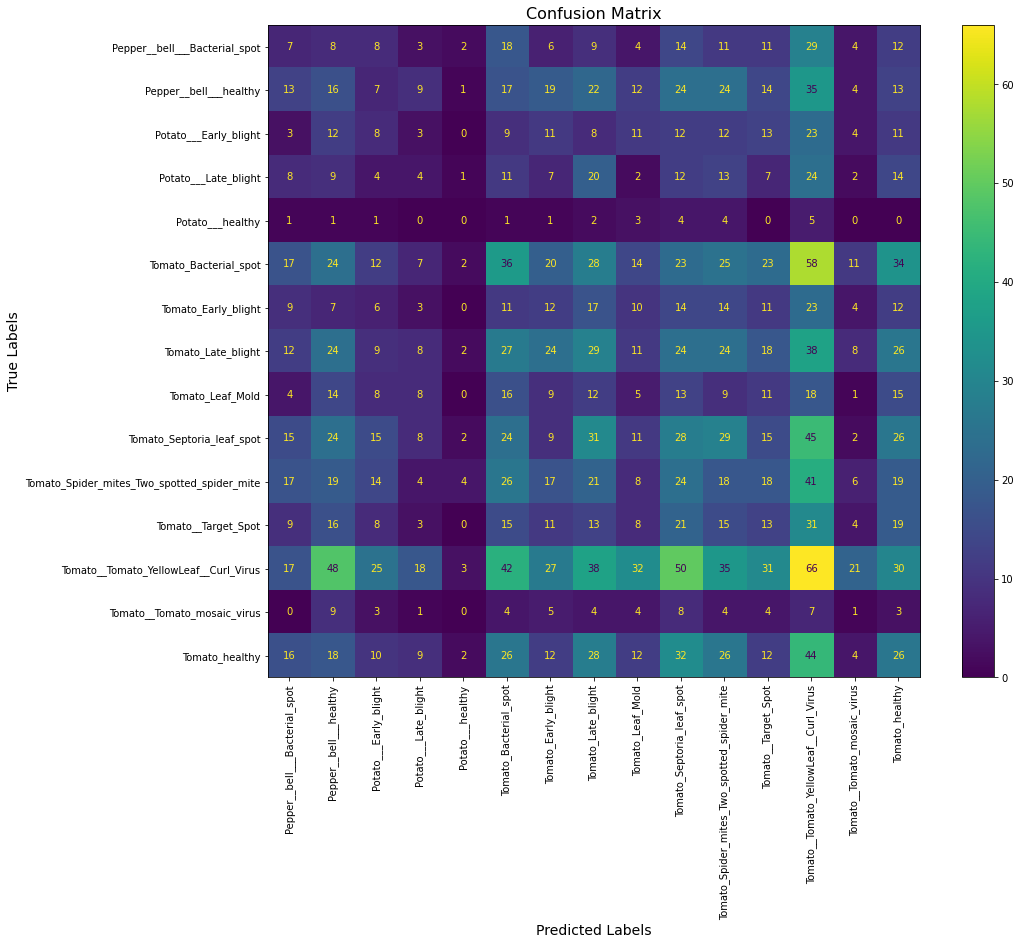

In [99]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Set the figure size
plt.figure(figsize=(15, 12))  # Adjust width and height as needed

# Create the ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=full_dataset.class_names)

# Plot the confusion matrix
disp.plot(cmap='viridis', xticks_rotation='vertical', ax=plt.gca())  # Use the current axes (ax)

# Set title and show the plot
plt.title("Confusion Matrix", fontsize=16)  # Increase title font size
plt.xlabel("Predicted Labels", fontsize=14)  # Increase x-axis label font size
plt.ylabel("True Labels", fontsize=14)  # Increase y-axis label font size

# Save the figure with increased size
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()


### Inferences based on the heatmap:

- Overall Performance: The model performs well, as shown by the bright diagonal line from top-left to bottom-right. This indicates many correct predictions.
- Best Predictions: Some classes like "Tomato_healthy" and "Pepper_bell_Bacterial_spot" have very bright squares, meaning the model predicts these accurately.
- Common Mistakes:
    - The model sometimes confuses "Tomato_Early_blight" with "Tomato_Late_blight".
    - "Tomato_Septoria_leaf_spot" is occasionally misclassified as "Tomato_Leaf_Mold".

- Challenging Classes: "Tomato_Yellow_Leaf_Curl_Virus" seems harder to predict correctly, with more misclassifications.
- Similar Diseases: Closely related plant diseases (like different tomato blights) cause more confusion for the model.
- Balanced Performance: The model doesn't seem to heavily favor any one class over others, as the diagonal is fairly consistent in brightness.
- Few Major Errors: There are no very bright spots far from the diagonal, meaning the model rarely makes drastically wrong predictions.

In [93]:
# Generate classification report
target_names = full_dataset.class_names
class_report = classification_report(true_classes, predicted_classes, target_names=target_names)
print("Classification Report:\n", class_report)


Classification Report:
                                              precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.05      0.05      0.05       146
                     Pepper__bell___healthy       0.06      0.07      0.07       230
                      Potato___Early_blight       0.06      0.06      0.06       140
                       Potato___Late_blight       0.05      0.03      0.04       138
                           Potato___healthy       0.00      0.00      0.00        23
                      Tomato_Bacterial_spot       0.13      0.11      0.12       334
                        Tomato_Early_blight       0.06      0.08      0.07       153
                         Tomato_Late_blight       0.10      0.10      0.10       284
                           Tomato_Leaf_Mold       0.03      0.03      0.03       143
                  Tomato_Septoria_leaf_spot       0.09      0.10      0.10       284
Tomato_Spider_mites_Two_spotted_spider_m

### Based on the classification report, here are some insight:

1. Overall Performance: The model's accuracy is quite low at only 9% across all classes. This suggests significant room for improvement.
2. Balanced Struggle: The model struggles with all classes, as shown by consistently low precision, recall, and F1-scores (mostly below 0.10).
3. Best Performer: 
    - "Tomato__Tomato_YellowLeaf__Curl_Virus" is the best-predicted class, but still only with 14% precision and recall.
4. Weakest Areas:
    - The model completely fails to identify "Potato___healthy" (0% across all metrics).
    - "Tomato__Tomato_mosaic_virus" is barely recognized (1-2% scores).

5. No Clear Strengths: No class stands out as being predicted well, with most hovering around 5-10% for precision, recall, and F1-score.
6. Consistency: The model's poor performance is consistent across classes, suggesting a fundamental issue with the model or training process rather than problems with specific classes.
7. Class Imbalance: The 'support' column shows varying numbers of samples per class, which might contribute to the uneven performance.
8. Practical Implications: In its current state, this model is not reliable for identifying plant diseases or health conditions. It's essentially guessing rather than making informed predictions.
9. To improve the performance we can increase the number of training data set model to make the model learn properly.

## The END